In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import LinearSVC,SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

17.1 : Training a Linear Classifier

In [3]:
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = LinearSVC(C=1.0)
model = svc.fit(features_standardized,target)

Discussion

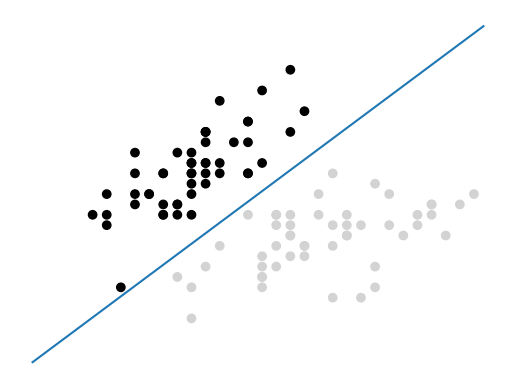

In [5]:
color = ["black" if c ==0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0],features_standardized[:,1],c=color)
w = svc.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-2.5,2.5)
yy = a * xx -(svc.intercept_[0]) /w[1]

plt.plot(xx,yy)
plt.axis("off"),plt.show();

In [6]:
new_observation = [[-2,3]]
svc.predict(new_observation)

array([0])

17.2 : Handling Linearly Inseparable Classes Using Kernels

In [9]:
np.random.seed(8)
features = np.random.randn(200,2)

target_xor = np.logical_xor(features[:,0]>0,features[:,1]>0)
target = np.where(target_xor,0,1)

svc = SVC(kernel="rbf",random_state=0,gamma=1,C=1)

model = svc.fit(features,target)

Discussion

In [10]:
def plot_decision_regions(X,y,classifier):
    cmap = ListedColormap(("red","blue"))
    xx1,xx2=np.meshgrid(np.arange(-3,3,0.02),np.arange(-3,3,0.02))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.1,Cmap=cmap)
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.8,
                    c=cmap(idx),
                    marker="+",
                    label=cl)

svc_linear = SVC(kernel='linear',random_state=0,C=1)

svc_linear.fit(features,target)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12592\3855574312.py:6: UserWarning: The following kwargs were not used by contour: 'Cmap'
  plt.contourf(xx1,xx2,Z,alpha=0.1,Cmap=cmap)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12592\3855574312.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl,0],


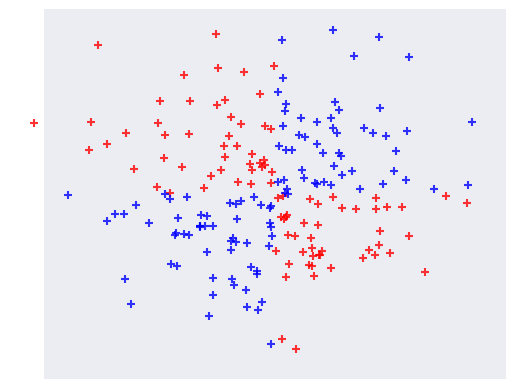

In [11]:
plot_decision_regions(features,target,classifier=svc_linear)
plt.axis("off"),plt.show();

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12592\3855574312.py:6: UserWarning: The following kwargs were not used by contour: 'Cmap'
  plt.contourf(xx1,xx2,Z,alpha=0.1,Cmap=cmap)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12592\3855574312.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl,0],


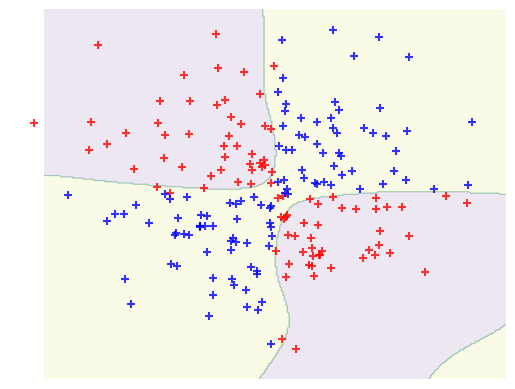

In [12]:
svc = SVC(kernel="rbf",random_state=0,gamma=1,C=1)
model =svc.fit(features,target)

plot_decision_regions(features,target,classifier=svc)
plt.axis("off"),plt.show();

17.3 : Creating Predicted Probabilities

In [13]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel="linear",probability=True,random_state=0)

model = svc.fit(features_standardized,target)
new_observation = [[.4,.4,.4,.4]]

model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

17.4 : Identifying Support Vectors

In [14]:
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel="linear",random_state=0)

model = svc.fit(features_standardized,target)
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

Discussion

In [15]:
model.support_

array([23, 41, 57, 98], dtype=int32)

In [16]:
model.n_support_

array([2, 2], dtype=int32)

17.5 : Handling Imbalanced Classes

In [18]:
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

features = features[40:,:]
target = target[40:]

target = np.where((target == 0),0,1)

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel="linear",class_weight="balanced",C=1.0,random_state=0)

model = svc.fit(features_standardized,target)